### Data Loading

In [98]:
import numpy as np
import pandas as pd

In [99]:
# Load data
pd.set_option('display.max_columns', None)
data = pd.read_csv("E:\College\cl\data (cl)\house_price\jabodetabek_house_price.csv")
data.head(1)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished


### Data Preparation

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [101]:
data.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [102]:
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
certificate              141
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
furnishing               387
dtype: int64


In [103]:
data.property_condition.value_counts()

property_condition
bagus             1437
baru              1328
bagus sekali       261
sudah renovasi     158
butuh renovasi      94
unfurnished         25
semi furnished       4
Name: count, dtype: int64

In [104]:
data.facilities.value_counts()

facilities
Keamanan, Taman                                                                                                                                                                                                                                                                                                                                                                                       400
Taman, Keamanan                                                                                                                                                                                                                                                                                                                                                                                       173
Keamanan 24 jam                                                                                                                                                                                          

In [105]:
data.certificate.value_counts()

certificate
shm - sertifikat hak milik       3001
hgb - hak guna bangunan           209
lainnya (ppjb,girik,adat,dll)     201
hp - hak pakai                      1
Name: count, dtype: int64

In [106]:
data.bedrooms.value_counts()

bedrooms
3.0     1379
2.0      957
4.0      802
5.0      218
6.0       93
1.0       19
7.0       14
8.0       10
10.0       5
12.0       5
20.0       2
9.0        2
16.0       2
13.0       2
11.0       2
37.0       1
21.0       1
36.0       1
50.0       1
57.0       1
54.0       1
99.0       1
Name: count, dtype: int64

In [107]:
data.bathrooms.value_counts()

bathrooms
2.0     1123
3.0      979
1.0      779
4.0      446
5.0      111
6.0       33
7.0       20
8.0       10
9.0        3
10.0       3
12.0       3
15.0       2
11.0       2
20.0       2
57.0       1
54.0       1
13.0       1
16.0       1
50.0       1
21.0       1
36.0       1
99.0       1
Name: count, dtype: int64

In [108]:
data.maid_bedrooms.value_counts()

maid_bedrooms
0.0    2078
1.0    1252
2.0     179
3.0      31
4.0       8
5.0       2
6.0       2
7.0       1
Name: count, dtype: int64

In [109]:
data.floors.value_counts()

floors
2.0    1986
1.0    1210
3.0     329
4.0      20
5.0       2
Name: count, dtype: int64

In [110]:
data.year_built.value_counts()

year_built
2022.0    1046
2021.0     199
2015.0     125
2020.0     106
2018.0      81
2019.0      68
2017.0      63
2010.0      62
2016.0      58
2014.0      43
2012.0      40
2000.0      39
2013.0      28
2005.0      23
2009.0      20
2011.0      13
2006.0      10
2008.0      10
2007.0       9
2002.0       7
1995.0       7
2004.0       5
2001.0       5
1988.0       4
1999.0       4
1990.0       4
1998.0       3
2003.0       3
1986.0       2
1993.0       2
1980.0       2
1994.0       2
2024.0       2
2025.0       1
1970.0       1
1996.0       1
1870.0       1
2052.0       1
1985.0       1
1982.0       1
2023.0       1
1976.0       1
1977.0       1
1973.0       1
1901.0       1
1992.0       1
Name: count, dtype: int64

In [111]:
data.furnishing.value_counts()

furnishing
unfurnished       2066
semi furnished     833
furnished          238
baru                29
Name: count, dtype: int64

In [112]:
data.garages.value_counts()

garages
0.0     1921
1.0     1018
2.0      519
4.0       42
3.0       31
6.0       10
5.0        6
10.0       3
12.0       1
20.0       1
50.0       1
Name: count, dtype: int64

In [113]:
data.garages.value_counts()

garages
0.0     1921
1.0     1018
2.0      519
4.0       42
3.0       31
6.0       10
5.0        6
10.0       3
12.0       1
20.0       1
50.0       1
Name: count, dtype: int64

In [114]:
data.district.value_counts()

district
Sentul City           282
Alam Sutera           115
Gading Serpong         97
Pantai Indah Kapuk     94
BSD                    83
                     ... 
Kedungbadak             1
Daan Mogot              1
Kedoya Utara            1
Menteng Atas            1
Sudimara                1
Name: count, Length: 380, dtype: int64

In [115]:
data.property_type.value_counts()

property_type
rumah    3552
Name: count, dtype: int64

### Data Cleaning

In [116]:
data = data.fillna(0)

In [117]:
# Eliminate data that is not included in the longitude and latitude range of Jabodetabek
data = data.loc[(data['lat'] >= -6.6) & (data['lat'] <= -6.1) & (data['long'] >= 106.6) & (data['long'] <= 107.1)]

In [118]:
# Change 'property_type' to the appropriate property type based on 'title'
data.loc[(data['title'].str.contains('kos|kost|kontrakan', case=False))]= 'kost'
data.loc[(data['title'].str.contains('ruko', case=False)), 'property_type'] = 'ruko'

In [119]:
data.property_type.value_counts()

property_type
rumah    2963
kost       17
ruko        2
Name: count, dtype: int64

In [120]:
# Replace the 'bedrooms' value with the sum of 'bedrooms' and 'maid bedrooms'
data['bedrooms'] = data['bedrooms'] + data['maid_bedrooms']

data['bedrooms'].isnull().sum()

0

In [121]:
# Replace the 'bathrooms' value with the sum of 'bathrooms' and 'maid bathrooms'
data['bathrooms'] = data['bathrooms'] + data['maid_bathrooms']

data['bathrooms'].isnull().sum()

0

In [122]:
# Removing rows where 'land_size_m2' is NaN
data = data.dropna(subset=['land_size_m2'])

data['land_size_m2'].isnull().sum()

0

In [123]:
# Replace the 'facilities' value with the number of facilities
data['facilities'] = data['facilities'].apply(lambda x: len(x.split(',')))

In [124]:
# Eliminating the word 'mah' in the 'electricity' column
data['electricity'] = data['electricity'].str.replace('mah', '')

In [125]:
# Delete rows with 'property_type' values other than 'house'
data = data[data['property_type'] == 'rumah']

Encoding

In [128]:
for col in data.columns:
    if data[col].dtype != 'int':
        data[col] = data[col].astype(str)


In [130]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

### Choosing Feature

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

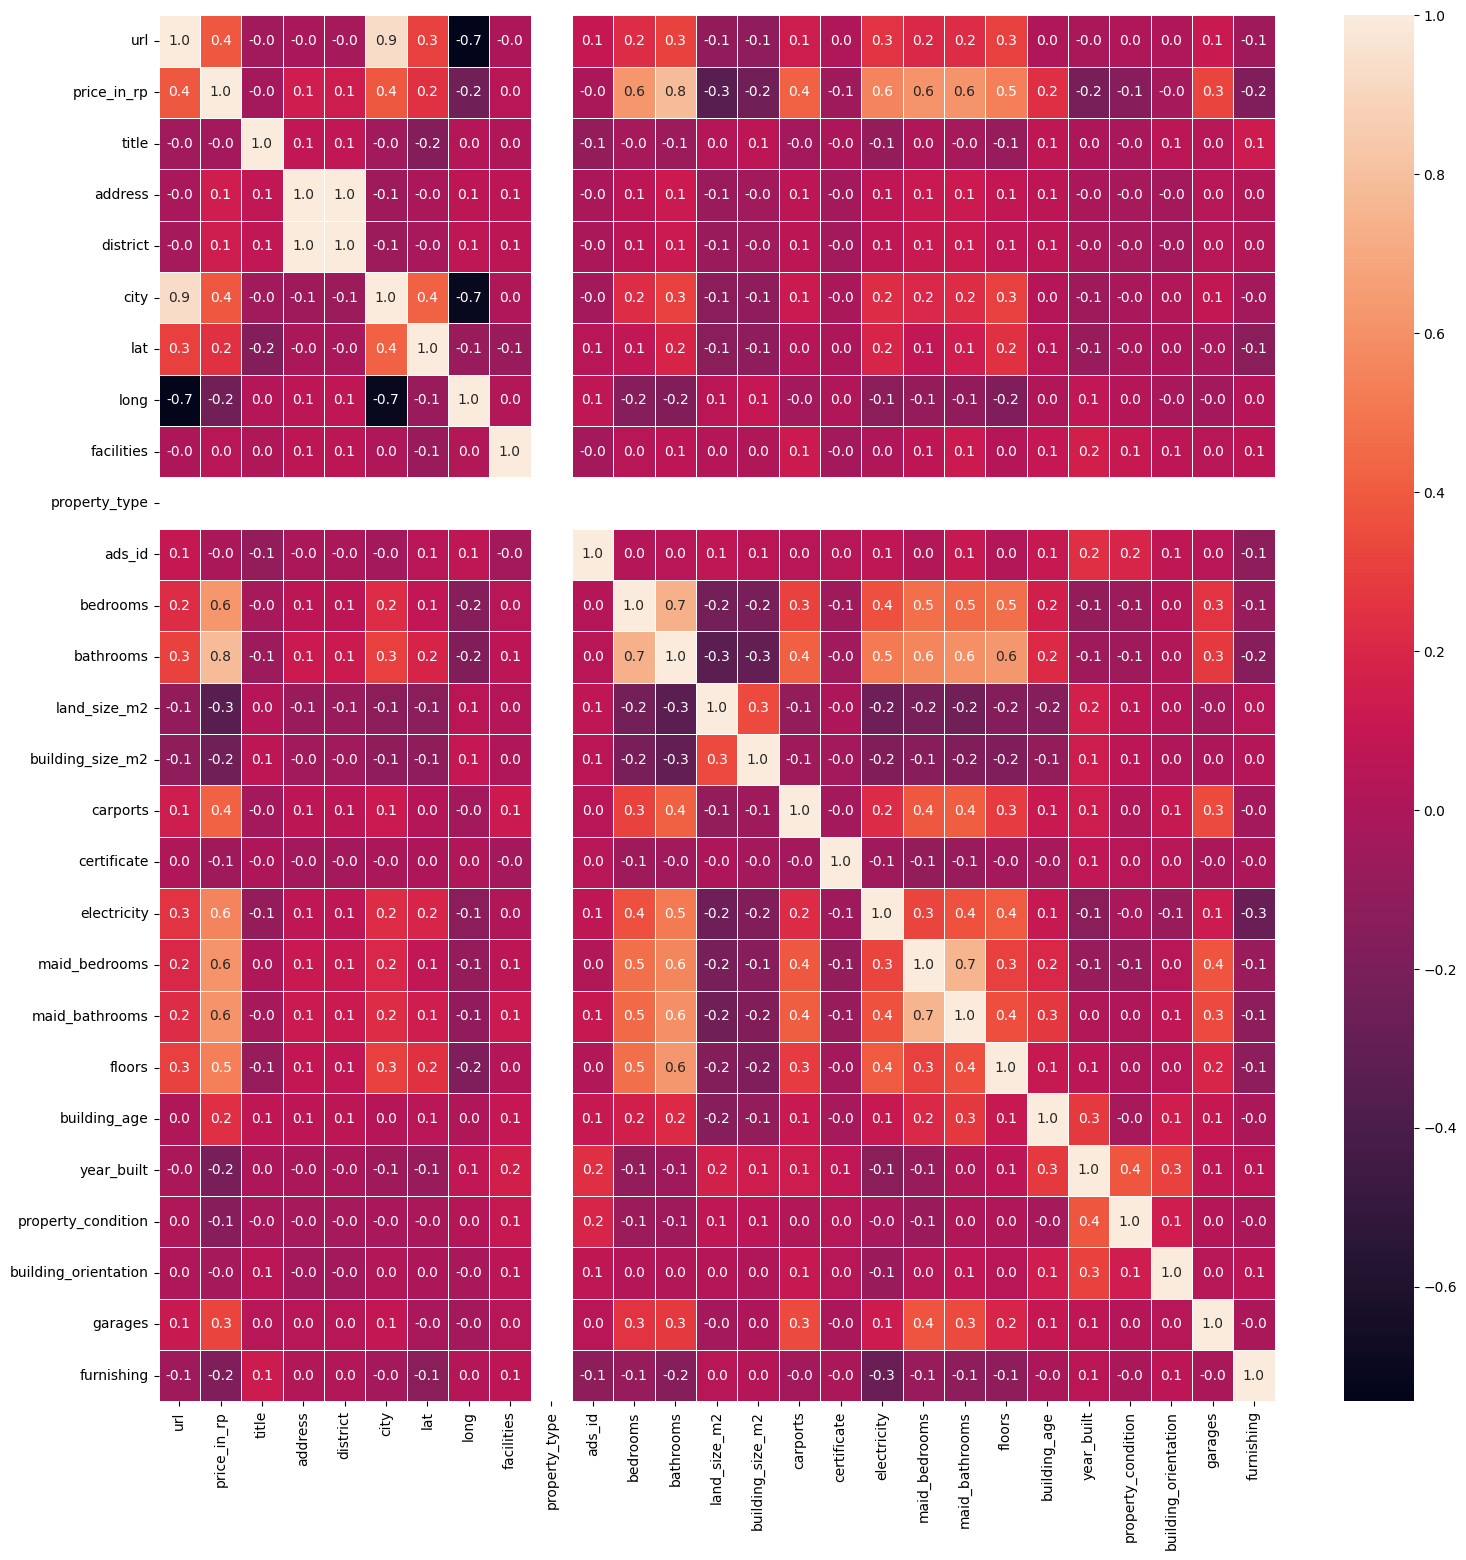

In [132]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [133]:
#Remove columns that have a correlation with 'price_in_rp' below average
corr_matrix = data.corr()

avg_corr = corr_matrix['price_in_rp'].mean()

cols_to_drop = corr_matrix.loc[(corr_matrix['price_in_rp'] < avg_corr) & 
                               (corr_matrix.index != 'price_in_rp') & 
                               (corr_matrix.index != 'long') & 
                               (corr_matrix.index != 'lat')].index

data = data.drop(cols_to_drop, axis=1)